# import libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import warnings
np.random.seed(34)
warnings.filterwarnings('ignore')

In [109]:
# naming the columns
columns = [
        "Engine",
        "Cycle",
        "Operational Setting 1",
        "Operational Setting 2",
        "Operational Setting 3",
        "(Fan inlet temperature) (◦R)",
        "(LPC outlet temperature) (◦R)",
        "(HPC outlet temperature) (◦R)",
        "(LPT outlet temperature) (◦R)",
        "(Fan inlet Pressure) (psia)",
        "(bypass-duct pressure) (psia)",
        "(HPC outlet pressure) (psia)",
        "(Physical fan speed) (rpm)",
        "(Physical core speed) (rpm)",
        "(Engine pressure ratio(P50/P2)",
        "(HPC outlet Static pressure) (psia)",
        "(Ratio of fuel flow to Ps30) (pps/psia)",
        "(Corrected fan speed) (rpm)",
        "(Corrected core speed) (rpm)",
        "(Bypass Ratio) ",
        "(Burner fuel-air ratio)",
        "(Bleed Enthalpy)",
        "(Required fan speed)",
        "(Required fan conversion speed)",
        "(High-pressure turbines Cool air flow)",
        "(Low-pressure turbines Cool air flow)"
]

df_train = pd.read_csv('data/train.txt', sep='\s+', header=None, names=columns)
df_test = pd.read_csv('data/test.txt', sep='\s+', header=None, names=columns)
df_rul = pd.read_csv('data/target.txt', sep='\s+', header=None, names=['RUL'])

In [110]:
df_train.head()

,Engine,Cycle,Operational Setting 1,Operational Setting 2,Operational Setting 3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [111]:
df_test.head()

,Engine,Cycle,Operational Setting 1,Operational Setting 2,Operational Setting 3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [112]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Engine                                   20631 non-null  int64  
 1   Cycle                                    20631 non-null  int64  
 2   Operational Setting 1                    20631 non-null  float64
 3   Operational Setting 2                    20631 non-null  float64
 4   Operational Setting 3                    20631 non-null  float64
 5   (Fan inlet temperature) (◦R)             20631 non-null  float64
 6   (LPC outlet temperature) (◦R)            20631 non-null  float64
 7   (HPC outlet temperature) (◦R)            20631 non-null  float64
 8   (LPT outlet temperature) (◦R)            20631 non-null  float64
 9   (Fan inlet Pressure) (psia)              20631 non-null  float64
 10  (bypass-duct pressure) (psia)            20631

In [113]:
df_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Engine,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
Cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
Operational Setting 1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
Operational Setting 2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
Operational Setting 3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
(Fan inlet temperature) (◦R),20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
(LPC outlet temperature) (◦R),20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
(HPC outlet temperature) (◦R),20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
(LPT outlet temperature) (◦R),20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
(Fan inlet Pressure) (psia),20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [114]:
df_train.isnull().sum()

Engine                                     0
Cycle                                      0
Operational Setting 1                      0
Operational Setting 2                      0
Operational Setting 3                      0
(Fan inlet temperature) (◦R)               0
(LPC outlet temperature) (◦R)              0
(HPC outlet temperature) (◦R)              0
(LPT outlet temperature) (◦R)              0
(Fan inlet Pressure) (psia)                0
(bypass-duct pressure) (psia)              0
(HPC outlet pressure) (psia)               0
(Physical fan speed) (rpm)                 0
(Physical core speed) (rpm)                0
(Engine pressure ratio(P50/P2)             0
(HPC outlet Static pressure) (psia)        0
(Ratio of fuel flow to Ps30) (pps/psia)    0
(Corrected fan speed) (rpm)                0
(Corrected core speed) (rpm)               0
(Bypass Ratio)                             0
(Burner fuel-air ratio)                    0
(Bleed Enthalpy)                           0
(Required 

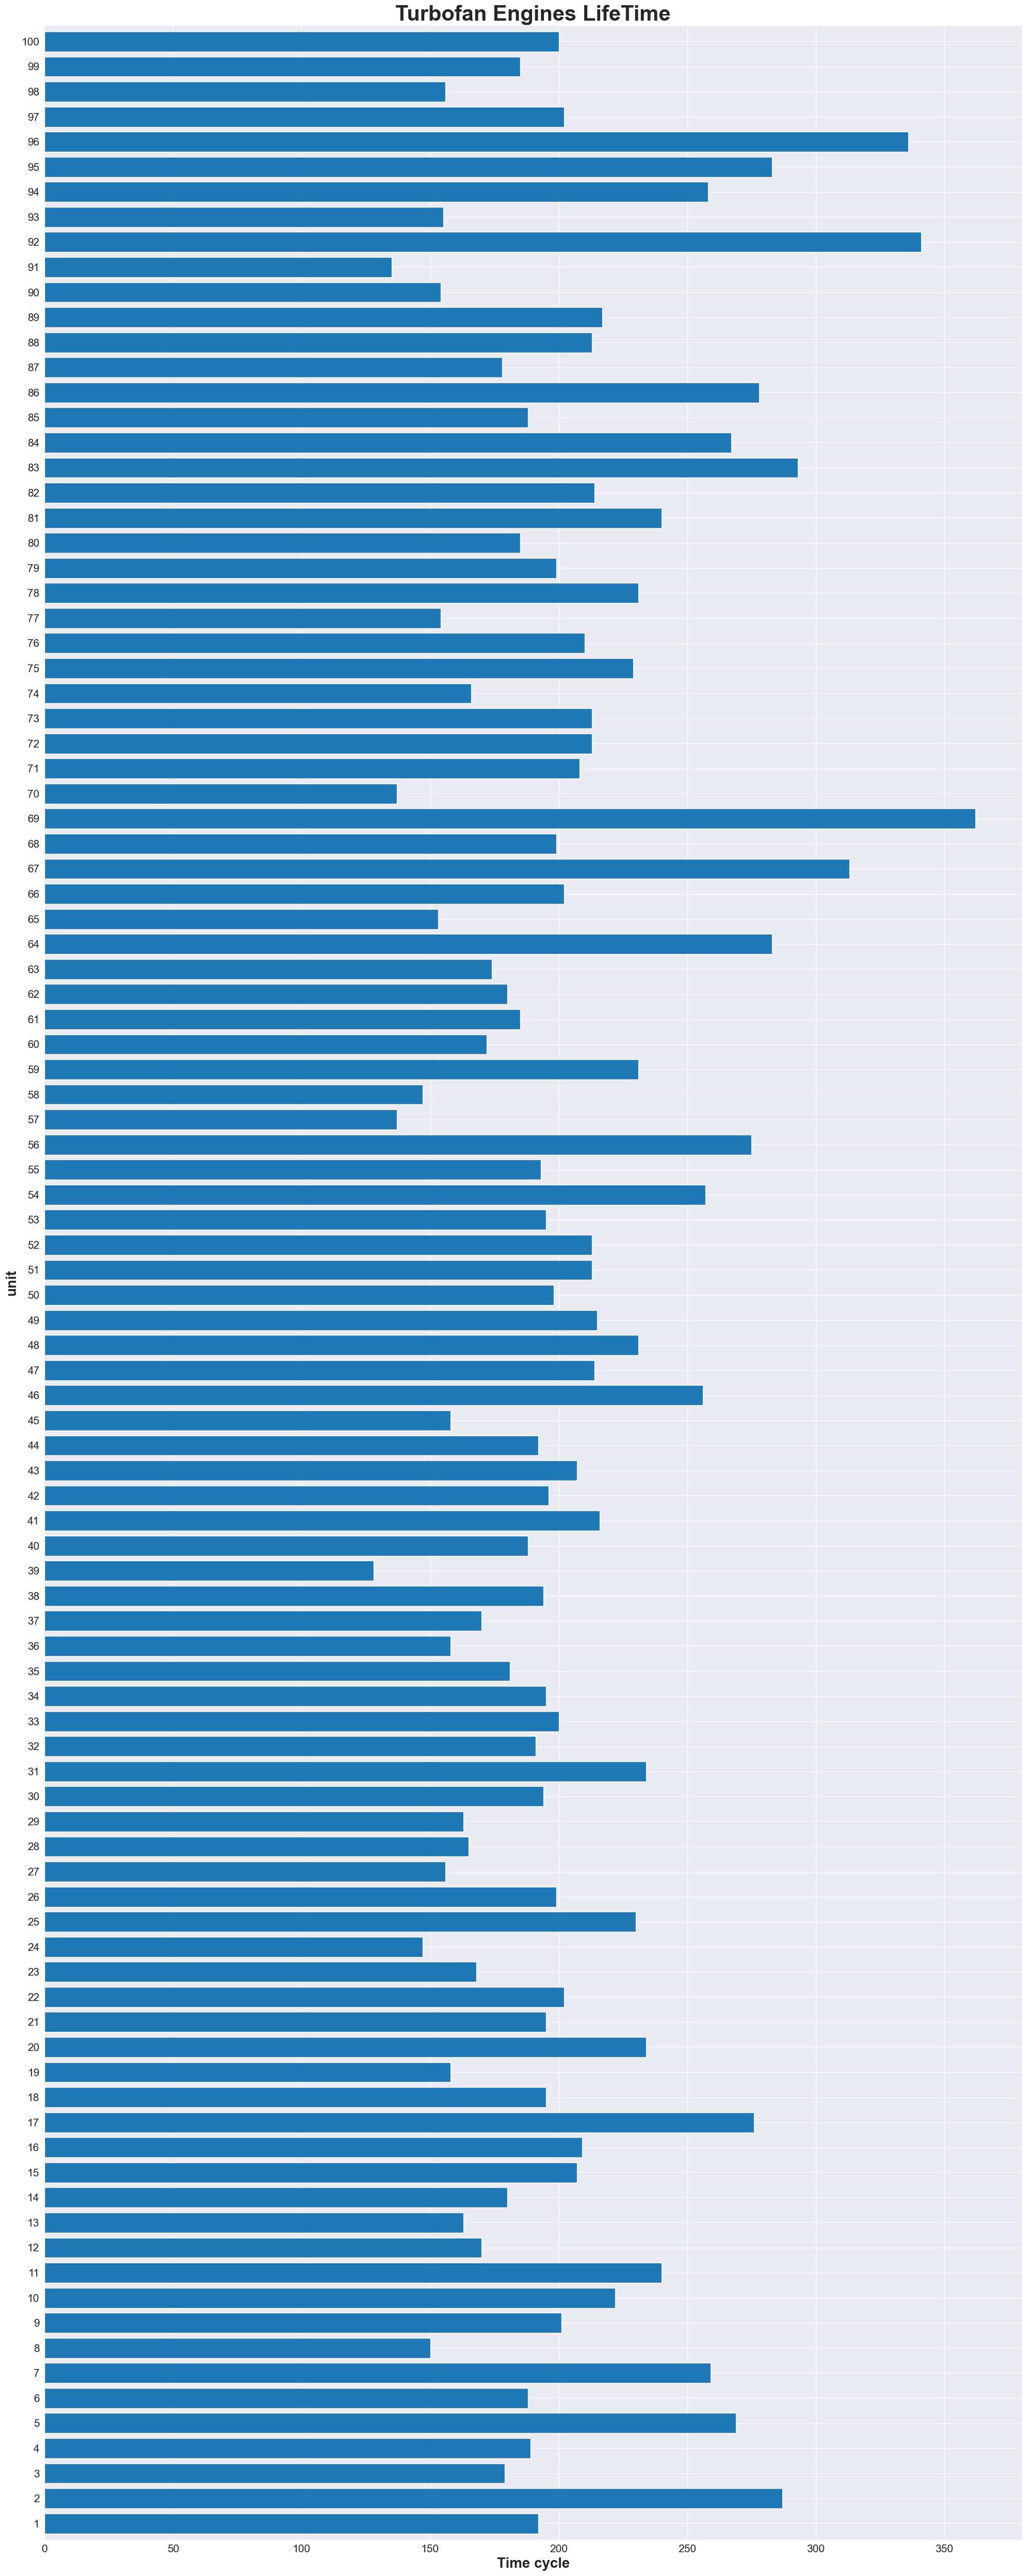

In [115]:
max_time_cycles=df_train[columns].groupby('Engine').max()
plt.figure(figsize=(20,50))
ax=max_time_cycles['Cycle'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

In [116]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="Engine")
    max_cycle = grouped_by_unit["Cycle"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='Engine', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["Cycle"]
    result_frame["RUL"] = remaining_useful_life
    
    # Drop the max_cycle which was only needed for calculating remaining useful life
    result_frame = result_frame.drop("max_cycle", axis=1)
    
    return result_frame

df_train = add_remaining_useful_life(df_train)
df_train.head()

,Engine,Cycle,Operational Setting 1,Operational Setting 2,Operational Setting 3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


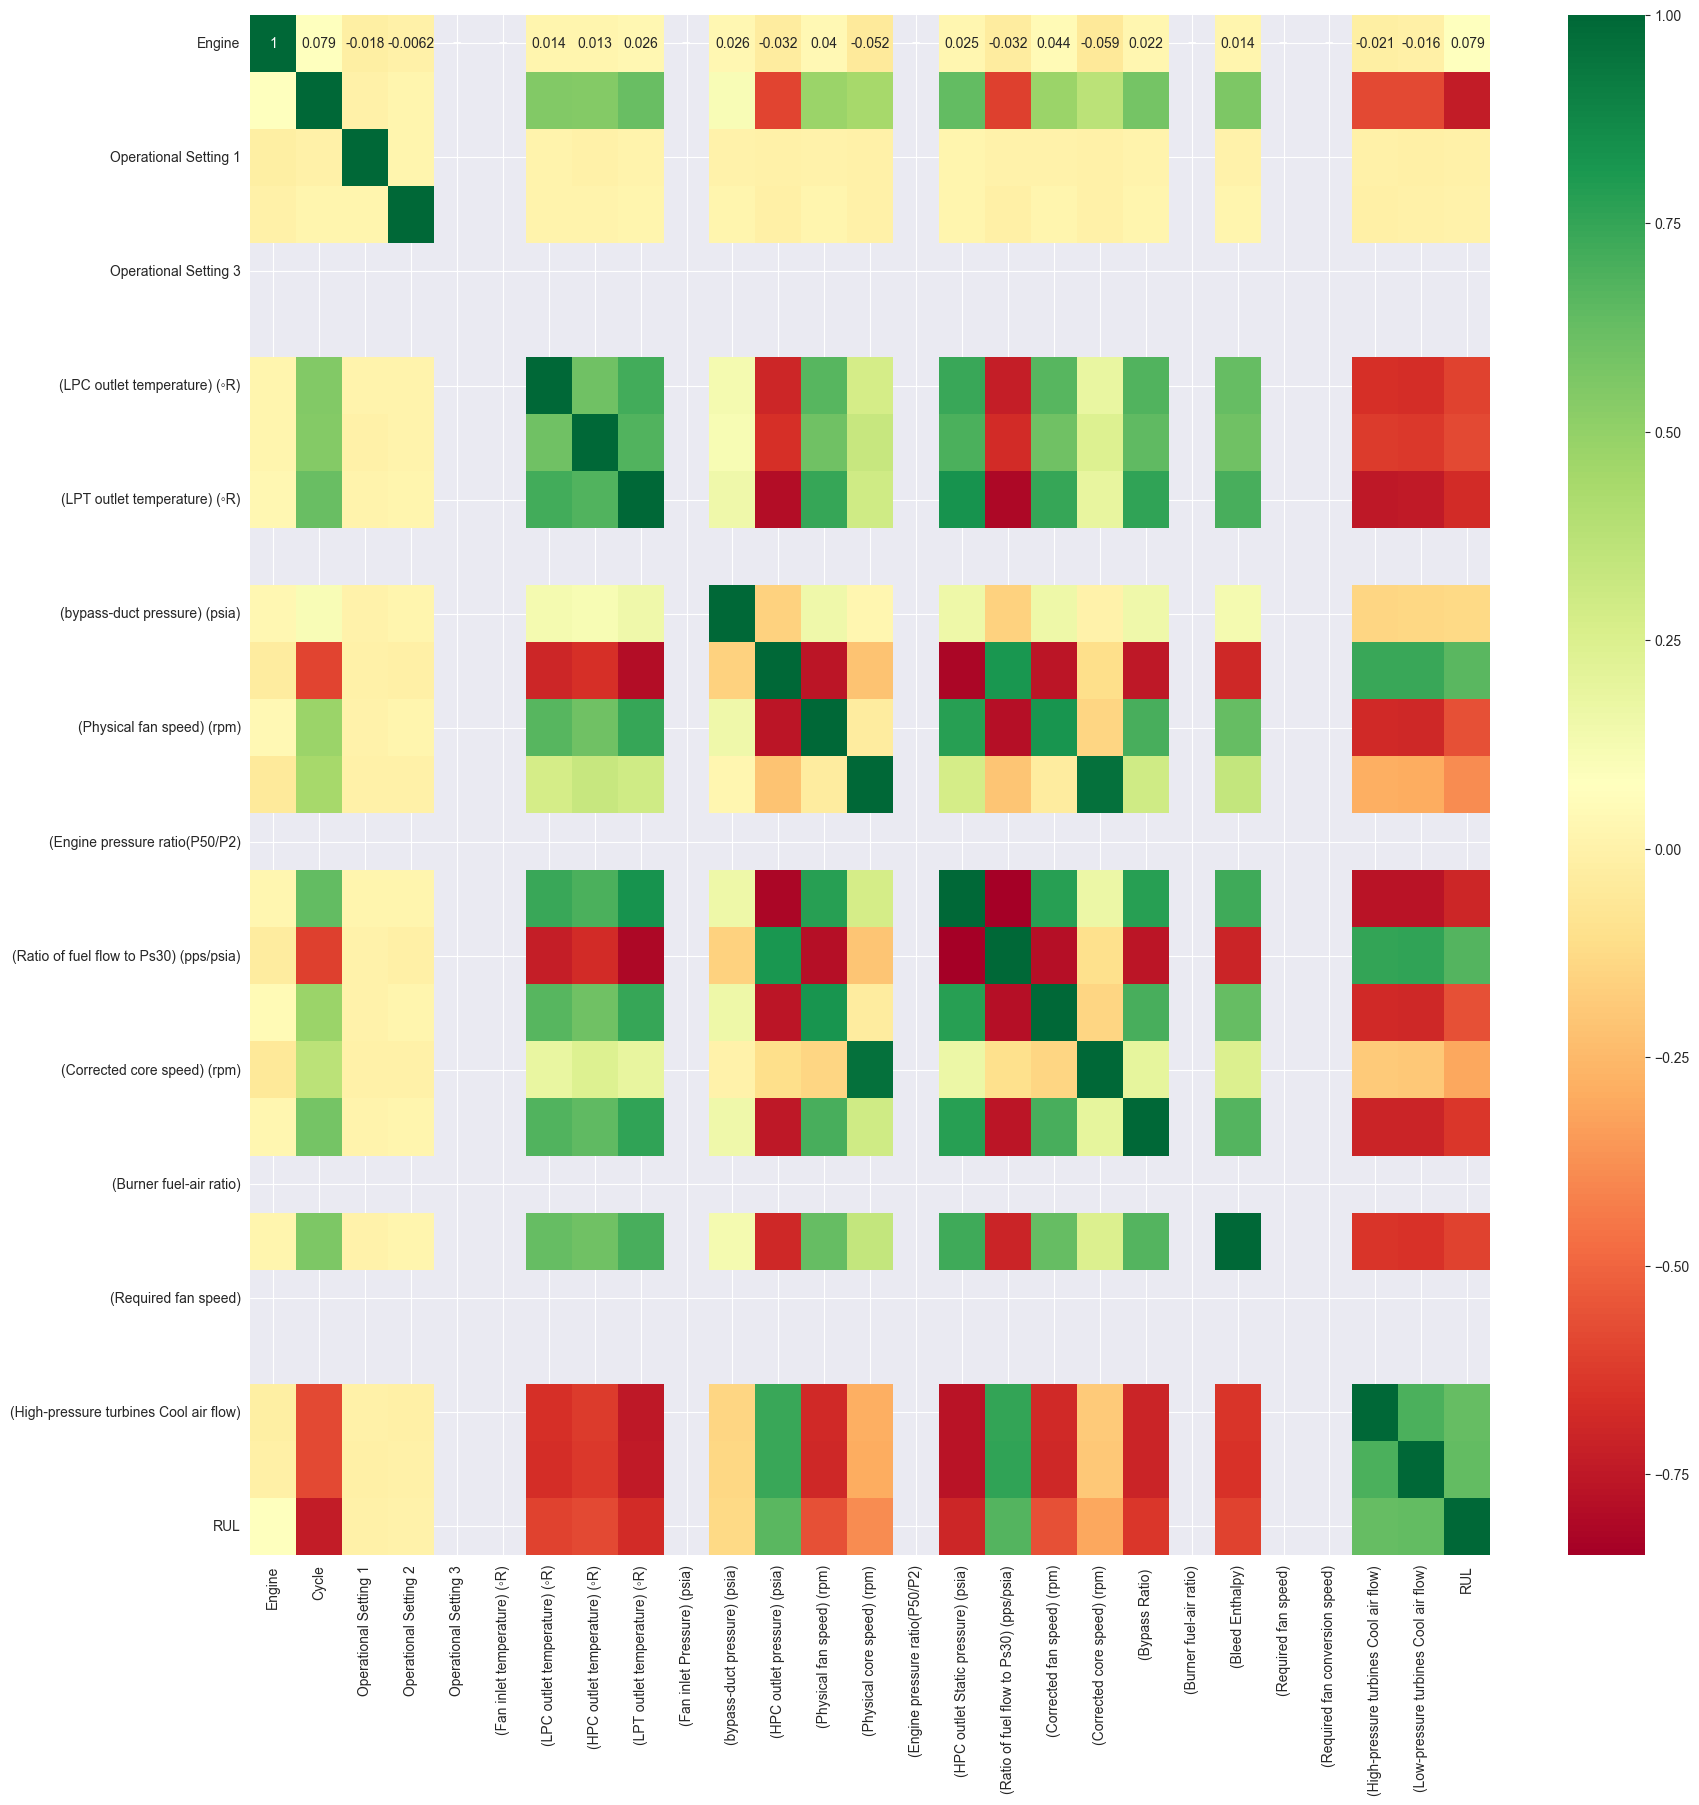

In [117]:
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [118]:
# Plotting the evolution of features (sensors) along with the evolution with RUL
def plot_evolution(df, unit):
    unit_data = df[df["Engine"] == unit]
    plt.figure(figsize=(20, 20))
    for i, column in enumerate(df.columns[2:]):
        plt.subplot(7, 3, i + 1)
        plt.plot(unit_data["Cycle"], unit_data[column])
        plt.title(column)
        plt.xlabel("Cycle")
        plt.ylabel(column)
    plt.tight_layout()
    plt.show()

ValueError: num must be an integer with 1 <= num <= 21, not 22

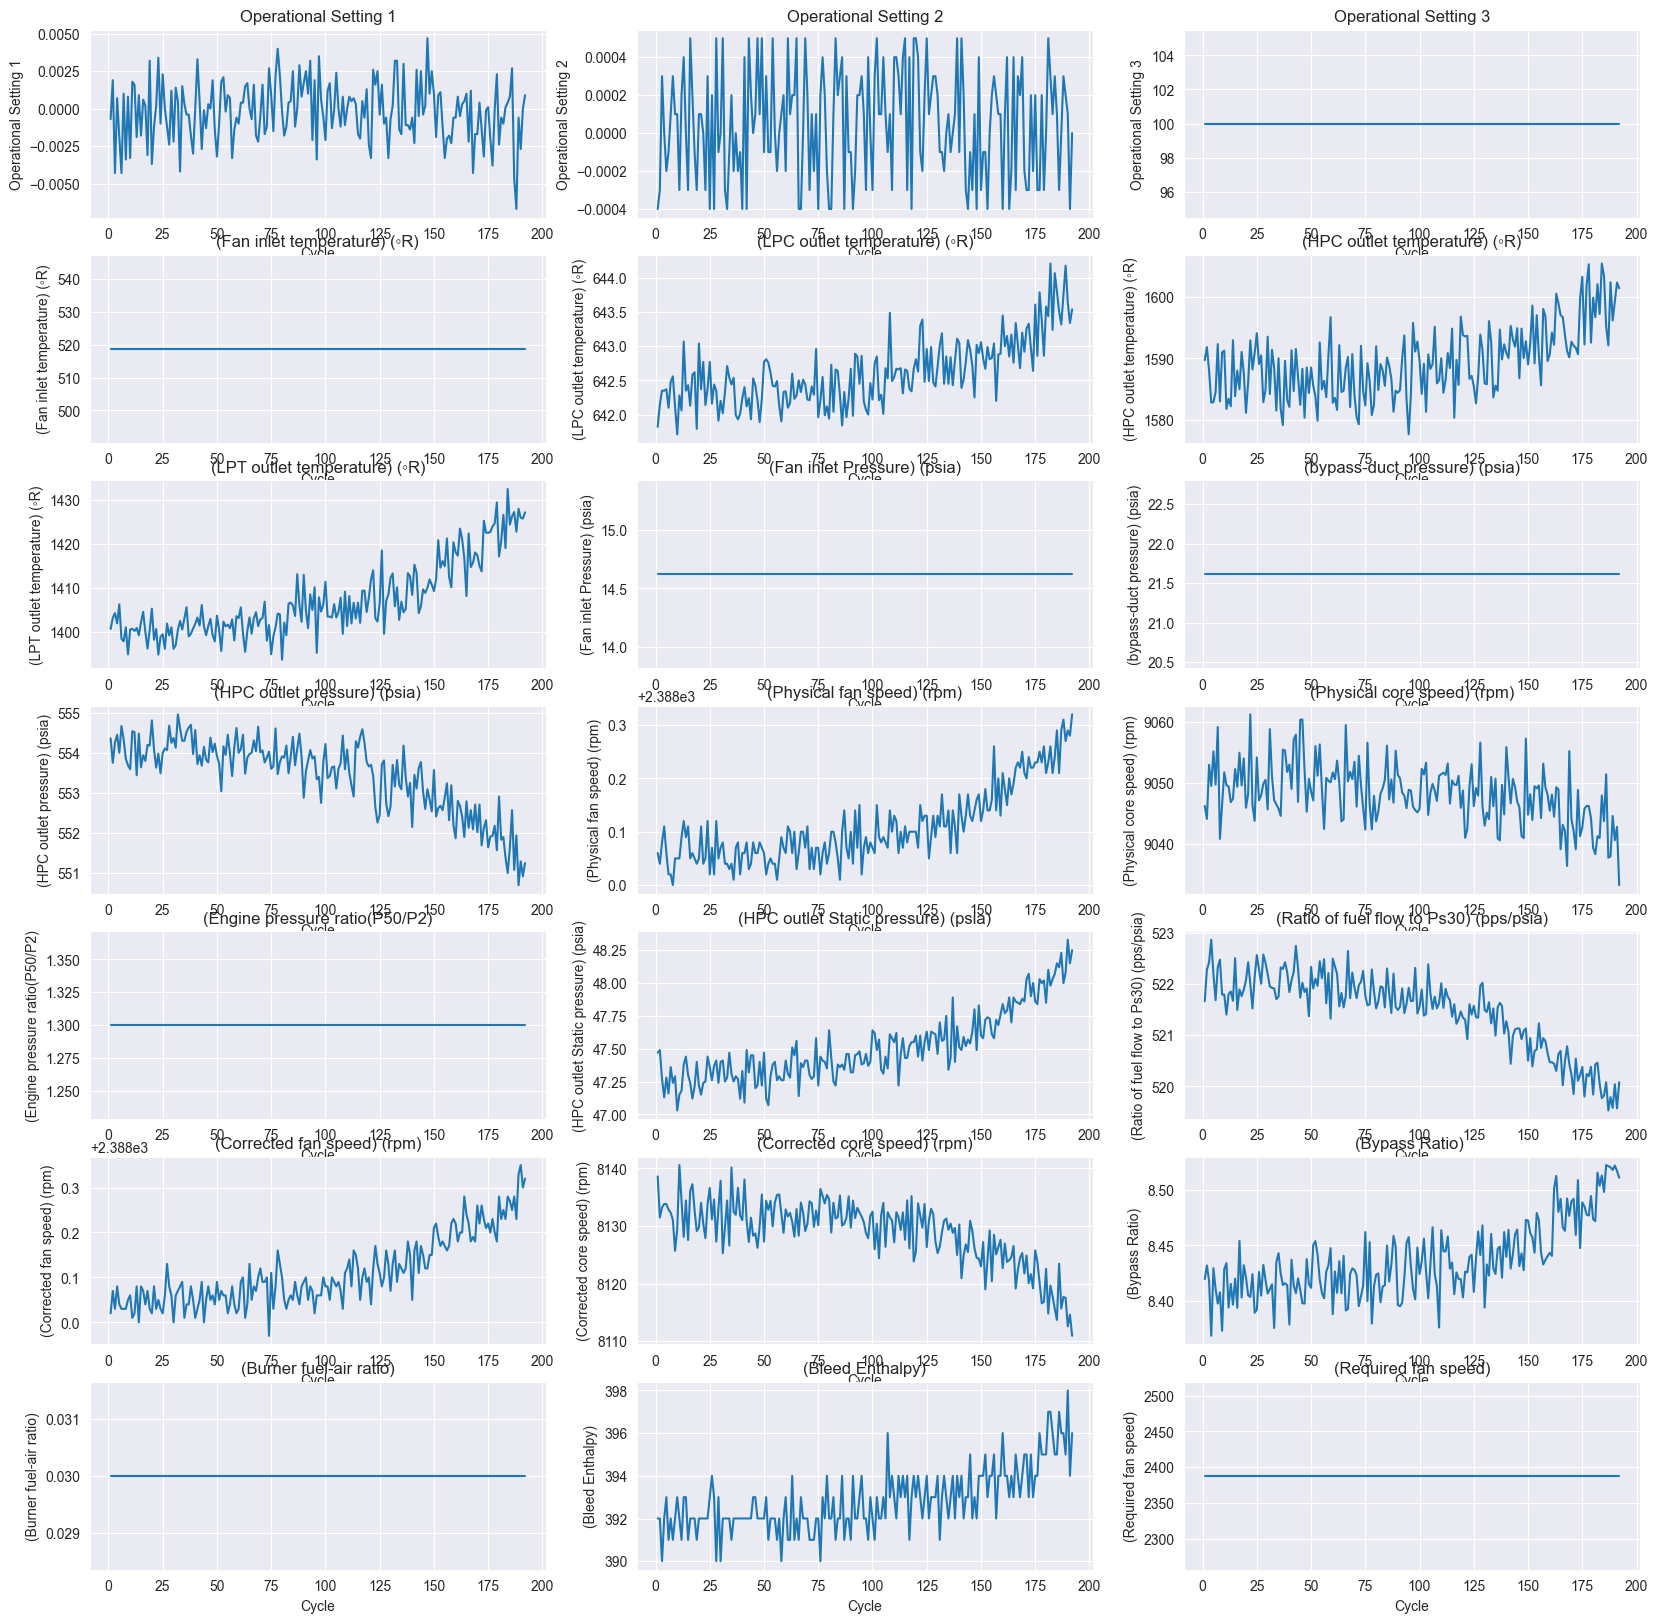

In [119]:
for i in range(1, 21):
    plot_evolution(df_train, i)

In [ ]:
from sklearn.model_selection import train_test_split
drop_labels = ['Engine', 'Cycle', 'Operational Setting 1', 'Operational Setting 2', 'Operational Setting 3']
X_train=df_train.drop(columns=drop_labels).copy()
X_train, X_test, y_train, y_test=train_test_split(X_train,X_train['RUL'], test_size=0.3, random_state=42)

In [ ]:
X_train

In [ ]:
#df_test = add_remaining_useful_life(df_test)
#df_test.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Tester = X_test.copy()
Trainer = X_train.copy()

#Droping the target variable
X_train.drop(columns=[
    'RUL', '(Fan inlet temperature) (◦R)','(Fan inlet Pressure) (psia)', '(bypass-duct pressure) (psia)',
    '(Engine pressure ratio(P50/P2)', '(Burner fuel-air ratio)', '(Required fan speed)', '(Required fan conversion speed)'],
    inplace=True)
X_test.drop(columns=[
    'RUL', '(Fan inlet temperature) (◦R)','(Fan inlet Pressure) (psia)', '(bypass-duct pressure) (psia)',
    '(Engine pressure ratio(P50/P2)', '(Burner fuel-air ratio)', '(Required fan speed)', '(Required fan conversion speed)'],
    inplace=True)
#Scaling X_train and X_test
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)
#Conserve only the last occurence of each unit to match the length of y_valid
X_valid = df_test.groupby('Engine').last().reset_index().drop(columns=drop_labels)
Validator = X_valid.copy()
X_valid.drop(columns=['(Fan inlet temperature) (◦R)','(Fan inlet Pressure) (psia)', '(bypass-duct pressure) (psia)',
    '(Engine pressure ratio(P50/P2)', '(Burner fuel-air ratio)', '(Required fan speed)', '(Required fan conversion speed)'],
    inplace=True)
#scaling X_valid
X_valid_s=scaler.fit_transform(X_valid)

In [145]:
from sklearn.model_selection import cross_val_score

def evaluate(y_true, y_hat, label='test'):
    cv_score = cross_val_score(regressor, X_train_s, y_train, cv=5)
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    r2 = r2_score(y_true, y_hat)
    return rmse, variance, r2, cv_score.mean()

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge

regressors = {
    'LinearRegression': LinearRegression(),
    'LassoCV': LassoCV(),
    'ElasticNetCV': ElasticNetCV(),
    'RidgeCV': RidgeCV(),
    'BayesianRidge': BayesianRidge()
}

models_results = []

for regressor_name, regressor in regressors.items():
    regressor.fit(X_train_s, y_train)
    y_hat_train = regressor.predict(X_train_s)
    train_results = evaluate(y_train,y_hat_train, label='train')
    
    y_hat_test = regressor.predict(X_test_s)
    test_results = evaluate(y_test, y_hat_test, 'test')
    
    y_hat_valid = regressor.predict(X_valid_s)
    valid_results = evaluate(df_rul, y_hat_valid, label='valid')
    
    models_results.append({
        'model': regressor_name,
        'train_rmse': train_results[0],
        'train_variance': train_results[1],
        'train_r2': train_results[2],
        'train_cv_score': train_results[3],
        'test_rmse': test_results[0],
        'test_variance': test_results[1],
        'test_r2': test_results[2],
        'test_cv_score': test_results[3],
    })

models_results = pd.DataFrame(models_results)
models_results

,model,train_rmse,train_variance,train_r2,train_cv_score,test_rmse,test_variance,test_r2,test_cv_score
0,LinearRegression,44.803728,0.583014,0.583014,0.582009,46.114026,0.535736,0.535736,0.582009
1,LassoCV,44.803988,0.583009,0.583009,0.582005,46.015873,0.537710,0.537710,0.582005
2,ElasticNetCV,45.012578,0.579117,0.579117,0.578646,46.147439,0.535063,0.535063,0.578646
3,RidgeCV,44.809316,0.582909,0.582909,0.581923,46.117257,0.535671,0.535671,0.581923
4,BayesianRidge,44.803944,0.583009,0.583009,0.582049,46.120734,0.535601,0.535601,0.582049


In [147]:
from sklearn.ensemble import VotingRegressor

voting_regressor = VotingRegressor(
    estimators=[(name, regressor) for name, regressor in regressors.items()]
)

voting_regressor.fit(X_train_s, y_train)

y_hat_train = voting_regressor.predict(X_train_s)
train_results = evaluate(y_train, y_hat_train, label='train')

y_hat_test = voting_regressor.predict(X_test_s)
test_results = evaluate(y_test, y_hat_test, label='test')

y_hat_valid = voting_regressor.predict(X_valid_s)
valid_results = evaluate(df_rul, y_hat_valid, label='valid')

result = {
    'model': 'VotingRegressor',
    'train_rmse': train_results[0],
    'train_variance': train_results[1],
    'train_r2': train_results[2],
    'train_cv_score': train_results[3],
    'test_rmse': test_results[0],
    'test_variance': test_results[1],
    'test_r2': test_results[2],
    'test_cv_score': test_results[3],
}

pd.DataFrame([result])

,model,train_rmse,train_variance,train_r2,train_cv_score,test_rmse,test_variance,test_r2,test_cv_score
0,VotingRegressor,44.815404,0.582796,0.582796,0.582049,46.065317,0.536716,0.536716,0.582049
